
# AE 12: Building a spam filter
### Author: ADD NAME HERE
### Date: ADD DATE HERE

In this application exercise, we will

-   Use logistic regression to fit a model for a binary response variable
-   Fit a logistic regression model in Python
-   Use a logistic regression model for classification

To illustrate logistic regression, we will build a spam filter from email data.

The data come from incoming emails in David Diez's (one of the authors of OpenIntro textbooks) Gmail account for the first three months of 2012.
All personally identifiable information has been removed.
    

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

np.random.seed(123)

email = pd.read_csv('data/email.csv')

import warnings
warnings.filterwarnings('ignore')

In [16]:

print(email.info())
print(email.describe())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          3921 non-null   int64  
 1   to_multiple   3921 non-null   int64  
 2   from          3921 non-null   int64  
 3   cc            3921 non-null   int64  
 4   sent_email    3921 non-null   int64  
 5   time          3921 non-null   object 
 6   image         3921 non-null   int64  
 7   attach        3921 non-null   int64  
 8   dollar        3921 non-null   int64  
 9   winner        3921 non-null   object 
 10  inherit       3921 non-null   int64  
 11  viagra        3921 non-null   int64  
 12  password      3921 non-null   int64  
 13  num_char      3921 non-null   float64
 14  line_breaks   3921 non-null   int64  
 15  format        3921 non-null   int64  
 16  re_subj       3921 non-null   int64  
 17  exclaim_subj  3921 non-null   int64  
 18  urgent_subj   3921 non-null 


The variables we'll use in this analysis are

-   `spam`: 1 if the email is spam, 0 otherwise
-   `exclaim_mess`: The number of exclamation points in the email message

**Goal:** Use the number of exclamation points in an email to predict whether or not it is spam.

# Exploratory data analysis

Let's start by taking a look at our data.
Create an density plot to investigate the relationship between `spam` and `exclaim_mess`.
Additionally, calculate the mean number of exclamation points for both spam and non-spam emails.
    

In [17]:
# add code here


# Linear model -- a false start

Suppose we try using a linear model to describe the relationship between the number of exclamation points and whether an email is spam.
Write up a linear model that models spam by exclamation marks.
    

In [18]:
# add code here


![](images/linear-spam.png){fig-align="center" width="672"}

-   **Your turn:** Is the linear model a good fit for the data? Why or why not?

*Add response here.*
    

# Logistic regression -- a different approach

Let $p$ be the probability an email is spam (success).

-   $\frac{p}{1-p}$: odds an email is spam (if p = 0.7, then the odds are 0.7/(1 - 0.7) = 2.33)
-   $\log\Big(\frac{p}{1-p}\Big)$: "log-odds", i.e., the natural log, an email is spam

The logistic regression model using the number of exclamation points as an explanatory variable is as follows:

$$\log\Big(\frac{p}{1-p}\Big) = \beta_0 + \beta_1 \times exclaim\_mess$$

The probability an email is spam can be calculated as:

$$p = \frac{\exp\{\beta_0 + \beta_1 \times exclaim\_mess\}}{1 + \exp\{\beta_0 + \beta_1 \times exclaim\_mess\}}$$
    


# Exercises

## Exercise 1

-   **Demo:** Fit the logistic regression model using the number of exclamation points to predict the probability an email is spam.
    

In [19]:

X = email[['exclaim_mess']]
y = email['spam']

log_reg = LogisticRegression()
log_reg.fit(X, y)

# Summary output
print(f"Intercept: {log_reg.intercept_[0]}")
print(f"Coefficient: {log_reg.coef_[0][0]}")
    

Intercept: -2.2723455073118823
Coefficient: 0.00027244323456666555



-   **Your turn:** How does the code above differ from previous code we've used to fit regression models? Compare your summary output to the estimated model below.

$$\log\Big(\frac{p}{1-p}\Big) = -2.27 - 0.000272 \times exclaim\_mess$$

*Add response here.*
    


## Exercise 2

What is the probability the email is spam if it contains 10 exclamation points?
Answer the question using the `log_reg.predict_proba()` function.
    

In [20]:

email_10_exclaim = np.array([[10]])
pred_prob = log_reg.predict_proba(email_10_exclaim)[0][1]
print(f"Predicted probability of spam for an email with 10 exclamation points: {pred_prob}")
    

Predicted probability of spam for an email with 10 exclamation points: 0.09367037659458179



## Exercise 3

We have the probability an email is spam, but ultimately we want to use the probability to classify an email as spam or not spam.
Therefore, we need to set a **decision-making threshold**, such that an email is classified as spam if the predicted probability is greater than the threshold and not spam otherwise.

Suppose you are a data scientist working on a spam filter.
You must determine how high the predicted probability must be before you think it would be reasonable to call it spam and put it in the junk folder (which the user is unlikely to check).

**Your turn:** What are some trade offs you would consider as you set the decision-making threshold?

*Add response here.*
    

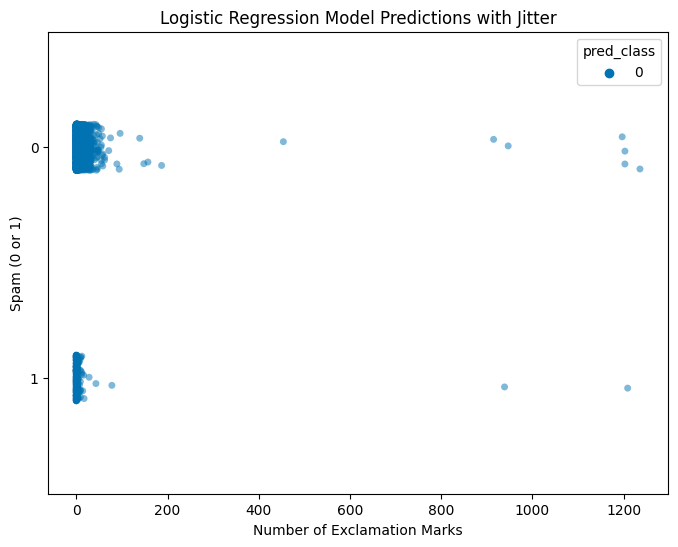

In [21]:

email['pred_class'] = (log_reg.predict_proba(X)[:, 1] >= 0.5).astype(int)

plt.figure(figsize=(8, 6))
sns.stripplot(data=email, x='exclaim_mess', y=email['spam'].astype(str), hue='pred_class', palette='colorblind', jitter=True, alpha=0.5)
plt.xlabel('Number of Exclamation Marks')
plt.ylabel('Spam (0 or 1)')
plt.title('Logistic Regression Model Predictions with Jitter')
plt.show()
    


## Exercise 4

Fit a model with **all** variables in the dataset as predictors and recreate the visualization above for this model.
    

In [22]:
# add code here


-   Use model evaluation metrics from `confusion_matrix` and `classification_report` to evaluate our model.
    

In [23]:
# add code here